In [35]:
import tensorflow as tf

In [36]:
mnist=tf.keras.datasets.mnist

In [37]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [38]:
x_train.shape

(60000, 28, 28)

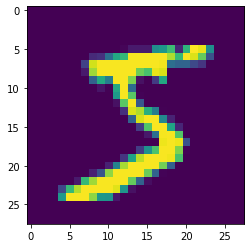

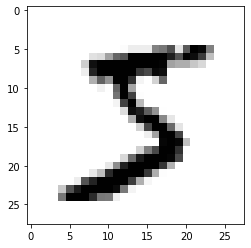

In [39]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [40]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

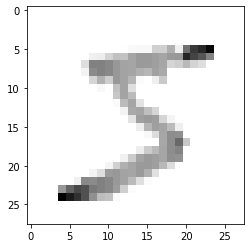

In [41]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [42]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [43]:
print(y_train[0])

5


In [44]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Samples Dimensions",x_trainr.shape)
print("Testing Samples Dimensions",x_testr.shape)

Training Samples Dimensions (60000, 28, 28, 1)
Testing Samples Dimensions (10000, 28, 28, 1)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [46]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [50]:
print("Total Training Samples= ",len(x_trainr))

Total Training Samples=  60000


In [51]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [52]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 69s 51ms/step - loss: 0.3207 - accuracy: 0.8989 - val_loss: 0.1134 - val_accuracy: 0.9645
Epoch 2/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.1041 - accuracy: 0.9696 - val_loss: 0.0822 - val_accuracy: 0.9754
Epoch 3/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0738 - accuracy: 0.9778 - val_loss: 0.0842 - val_accuracy: 0.9733
Epoch 4/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0566 - accuracy: 0.9822 - val_loss: 0.0622 - val_accuracy: 0.9799
Epoch 5/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0469 - accuracy: 0.9844 - val_loss: 0.0596 - val_accuracy: 0.9815


In [53]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples ",test_loss)
print("Validation accuracy on 10,000 test samples ",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0636 - accuracy: 0.9828
Test loss on 10,000 test samples  0.06363686174154282
Validation accuracy on 10,000 test samples  0.9828000068664551


In [54]:
predictions=model.predict([x_testr])

In [55]:
print(predictions)

[[1.17864744e-07 3.98518250e-06 5.93708592e-07 ... 9.99976754e-01
  1.23221335e-08 1.11436998e-06]
 [4.58144632e-06 7.25232758e-06 9.99901175e-01 ... 5.48756316e-06
  4.43612225e-06 3.28133319e-06]
 [4.03885281e-08 9.99972463e-01 2.77701247e-06 ... 6.54842950e-07
  1.11718066e-06 1.26519595e-07]
 ...
 [1.51420287e-09 1.61300102e-06 7.96159760e-09 ... 9.06725361e-08
  4.48347373e-06 2.28053595e-05]
 [1.69244631e-05 3.65897836e-06 3.10502543e-07 ... 2.35963764e-08
  2.45689705e-04 1.05653244e-05]
 [9.87815929e-06 7.83745122e-07 4.42235932e-06 ... 2.00737782e-09
  1.86786838e-06 2.18145715e-06]]


In [56]:
print(np.argmax(predictions[0]))

7


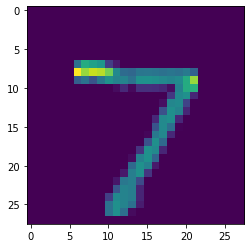

In [57]:
plt.imshow(x_test[0])

In [58]:
print(np.argmax(predictions[127]))

5


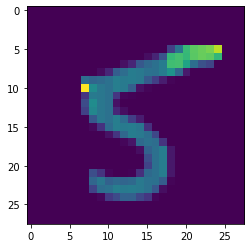

In [59]:
plt.imshow(x_test[127])

In [60]:
import cv2

In [61]:
img=cv2.imread('two.png')

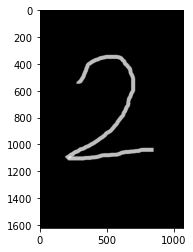

In [62]:
plt.imshow(img)

In [63]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray.shape

resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

resized.shape

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

newimg.shape

predictions=model.predict(newimg)

print(np.argmax(predictions))

2
